In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Study the graph constructed with weighted graph

General Doc

https://networkx.github.io/documentation/stable/reference/introduction.html#graph-creation

In [2]:
import copy

import os
import sys
import torch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import pickle
import shutil

In [4]:
# construct an undirected graph with 
G = nx.Graph(day="Friday")
G.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
print(G.adj)

{1: {2: {'weight': 0.5}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.5}}, 3: {1: {'weight': 0.75}}}


### Construct graph by reading weighed edge list

Documentation:

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.readwrite.edgelist.read_weighted_edgelist.html

In [10]:
# for our case need to confirm:
# 1) that the two direction of the edge share the same value of weight
# 2) subgraph generation can still separate edge together its weight
# 3) self_loop (the weight on the node itself) will be handled separately or not (Graph can add self-loop edge)
file_path = './data_use/networkx_data/'
file_name = 'weight_edge_list_1.txt'
""" for the undirected graph, default two direction of an edge share the same weight"""
G1 = nx.read_weighted_edgelist(file_path + file_name, create_using = nx.Graph)   # indicate that create an undirected graph: nx.Graph
print(G1.adj)

# source target data
# a b 1
# a c 3.14159
# d e 42

# output the corresponding weight
print('output weights for each edge of G1:')
""" The edges() only return one direction of each edge, including the self-loop"""
for left, right in G1.edges():
    print('edge ({}, {}) weight is: '.format(left, right), G1[left][right]['weight'])
#     print('edge ({}, {}) weight is: '.format(right, left), G1[right][left]['weight'])
print()
for left, right in G1.edges():
#     print('edge ({}, {}) weight is: '.format(left, right), G1[left][right]['weight'])
    print('edge ({}, {}) weight is: '.format(right, left), G1[right][left]['weight'])
    
sub_ab = G1.subgraph(['a', 'b'])
for left, right in sub_ab.edges():
#     print('edge ({}, {}) weight is: '.format(left, right), G1[left][right]['weight'])
    print('edge ({}, {}) weight is: '.format(right, left), G1[right][left]['weight'])

{'a': {'b': {'weight': 1.0}, 'c': {'weight': 3.14159}, 'a': {'weight': 50.0}}, 'b': {'a': {'weight': 1.0}}, 'c': {'a': {'weight': 3.14159}}, 'd': {'e': {'weight': 42.0}}, 'e': {'d': {'weight': 42.0}}}
output weights for each edge of G1:
edge (a, b) weight is:  1.0
edge (a, c) weight is:  3.14159
edge (a, a) weight is:  50.0
edge (d, e) weight is:  42.0

edge (b, a) weight is:  1.0
edge (c, a) weight is:  3.14159
edge (a, a) weight is:  50.0
edge (e, d) weight is:  42.0
edge (a, b) weight is:  1.0
edge (a, a) weight is:  50.0


In [31]:
file_path = './data_use/networkx_data/'
file_name = 'weight_edge_list_2.txt'
""" If we have different weight for different direction of the same edge, it is also fine, just use the most recent result: """
G2 = nx.read_weighted_edgelist(file_path + file_name, create_using = nx.Graph)   # indicate that create an undirected graph: nx.Graph
# print the datastructure
print(G2.adj)
# print(G2.edges())
# output the corresponding weight
print('output weights for each edge of G2:')
for left, right in G2.edges():
    print('edge ({}, {}) weight is: '.format(left, right), G2[left][right]['weight'])
    print('edge ({}, {}) weight is: '.format(right, left), G2[right][left]['weight'])

{'a': {'b': {'weight': 1.0}, 'c': {'weight': 8.8}}, 'b': {'a': {'weight': 1.0}}, 'c': {'a': {'weight': 8.8}}, 'd': {'e': {'weight': 21.0}}, 'e': {'d': {'weight': 21.0}}}
output weights for each edge of G2:
edge (a, b) weight is:  1.0
edge (b, a) weight is:  1.0
edge (a, c) weight is:  8.8
edge (c, a) weight is:  8.8
edge (d, e) weight is:  21.0
edge (e, d) weight is:  21.0


#### cosntruct graph by reading from the in-memory weigted edge list

In [3]:
# elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
# G.add_edges_from(elist)
"""
    The Graph object does allow a self-loop as one edge with a specific edge weight:
"""
G4 = nx.Graph() 
egen = ((i, i, i+1) for i in range(8))
G4.add_weighted_edges_from(egen)
print(G4.adj)


G3 = nx.Graph() 
elist = [(1, 2, 5.0), (2, 3, 3.0), (1, 3, 1.0), (3, 4, 7.3), (4, 4, 100)]
G3.add_weighted_edges_from(elist)
print(G3.adj)
# print(G2.edges())
# output the corresponding weight
print('Frist way of iterate output weights for each edge of G3:')
for left, right in G3.edges():
    print('edge ({}, {}) weight is: '.format(left, right), G3[left][right]['weight'])
    print('edge ({}, {}) weight is: '.format(right, left), G3[right][left]['weight'])
    
print('second way of iterate output weights for each edge of G3:')
for left, right in G3.edges():
    print('edge ({}, {}) weight is: '.format(left, right), G3.edges[left, right]['weight'])
    print('edge ({}, {}) weight is: '.format(right, left), G3.edges[right, left]['weight'])
    
print('third way of iterate output weights for each edge of G3:')
# print(G3.edges.data('weight'))
for left, right, weight in G3.edges.data('weight'):
    print('edge ({}, {}) weight is: '.format(left, right), weight)
    print('edge ({}, {}) weight is: '.format(right, left), weight)

{0: {0: {'weight': 1}}, 1: {1: {'weight': 2}}, 2: {2: {'weight': 3}}, 3: {3: {'weight': 4}}, 4: {4: {'weight': 5}}, 5: {5: {'weight': 6}}, 6: {6: {'weight': 7}}, 7: {7: {'weight': 8}}}
{1: {2: {'weight': 5.0}, 3: {'weight': 1.0}}, 2: {1: {'weight': 5.0}, 3: {'weight': 3.0}}, 3: {2: {'weight': 3.0}, 1: {'weight': 1.0}, 4: {'weight': 7.3}}, 4: {3: {'weight': 7.3}, 4: {'weight': 100}}}
Frist way of iterate output weights for each edge of G3:
edge (1, 2) weight is:  5.0
edge (2, 1) weight is:  5.0
edge (1, 3) weight is:  1.0
edge (3, 1) weight is:  1.0
edge (2, 3) weight is:  3.0
edge (3, 2) weight is:  3.0
edge (3, 4) weight is:  7.3
edge (4, 3) weight is:  7.3
edge (4, 4) weight is:  100
edge (4, 4) weight is:  100
second way of iterate output weights for each edge of G3:
edge (1, 2) weight is:  5.0
edge (2, 1) weight is:  5.0
edge (1, 3) weight is:  1.0
edge (3, 1) weight is:  1.0
edge (2, 3) weight is:  3.0
edge (3, 2) weight is:  3.0
edge (3, 4) weight is:  7.3
edge (4, 3) weight is: 

In [47]:
# create the subgraph from the G3 above to check the weight is also separated:
G3_subgraph = G3.subgraph({1, 2, 3})
print(G3_subgraph.adj)
for left, right, weight in G3_subgraph.edges.data('weight'):
    print('edge ({}, {}) weight is: '.format(left, right), weight)
    print('edge ({}, {}) weight is: '.format(right, left), weight)

{1: FilterAtlas({2: {'weight': 5.0}, 3: {'weight': 1.0}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7f435e4a8e18>), 2: FilterAtlas({1: {'weight': 5.0}, 3: {'weight': 3.0}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7f435e4a8ea0>), 3: FilterAtlas({2: {'weight': 3.0}, 1: {'weight': 1.0}, 4: {'weight': 7.3}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7f435e4a8c80>)}
edge (1, 2) weight is:  5.0
edge (2, 1) weight is:  5.0
edge (1, 3) weight is:  1.0
edge (3, 1) weight is:  1.0
edge (2, 3) weight is:  3.0
edge (3, 2) weight is:  3.0


#### Graph algorithm implement

In [42]:
# As an example here is code to use Dijkstra’s algorithm to find the shortest weighted path:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G, 'a', 'd'))


['a', 'c', 'd']


### Draw a weighted graph

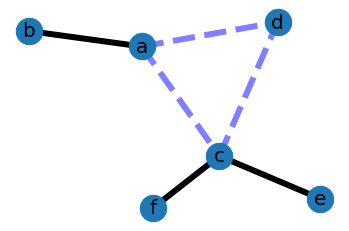

In [50]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, w) in G.edges.data('weight') if w > 0.5]
# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
# data (string or bool, optional (default=False)) – The edge attribute returned in 3-tuple (u, v, ddict[data]). If True, return edge attribute dict in 3-tuple (u, v, ddict). If False, return 2-tuple (u, v).
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes
"""
Position nodes using Fruchterman-Reingold force-directed algorithm.
The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close,
while treating nodes as repelling objects, 
sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.
"""
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

### Directed graph

In [25]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

print(DG.out_degree(1,weight='weight') )
print(DG.degree(1,weight='weight') )
print(DG.successors(1) )
print(DG.neighbors(1) )

0.5
1.25


### Get files information

In [24]:
import os
def print_dir_content_info(path):
    """
        print out the file information under the path :  (name, size(KB))
    """
    with os.scandir(path) as dir_contents:
        for entry in dir_contents:
            if entry.is_file():
                info = entry.stat()
                print('File name: [ {} ]; with size: {} KB'.format(entry.name, info.st_size / 1024))
print_dir_content_info('./empty/')

In [22]:
# %mkdir empty
